In [ ]:
#                                 Course End Project

# NewsGenie – An AI-Powered Information and News Assistant

# Overview

# In this project, you will build NewsGenie, an AI-powered information and news assistant
# designed to help users navigate today’s fast-paced digital landscape. You will develop a
# system that efficiently filters misinformation, curates reliable and up-to-date news, and
# provides quick answers to general queries—all within a single, unified platform.
# Instructions

# Submission: Submit a detailed report or presentation via the LMS, including:
# 1. AI chatbot design: Guidelines for conversation management and query
# differentiation
# 2. Real-time news integration: Sample outputs showing news updates for technology,
# finance, and sports categories
# 3. Workflow and error handling: A proposed process detailing API integration, fallback
# mechanisms, and overall query processing management

# Situation:

# People struggle to keep up with real-time, reliable news in today's fast-paced world. Users
# face challenges such as filtering misinformation, finding trustworthy sources, and securing
# timely answers to general queries—all in one place.

# Problem Statement:

# Modern news consumption is fragmented and often overwhelming, leaving users flooded
# with too much information, which makes it difficult to:
# • Stay updated with the most relevant and accurate news
# • Filter out unreliable or misleading content
# • Access personalized news feeds alongside general information quickly

# This environment demands a unified solution that can intelligently manage both
# conversational queries and real-time news updates.
# NewsGenie is designed to address these issues by serving as an intelligent assistant that
# provides both instant query responses and curated up-to-date news.

# Task:

# The core task is to build NewsGenie as a unified platform that:
# 1. Handles conversations: Develop an AI chatbot that can interpret and answer general
# queries while distinguishing them from news requests
# 2. Integrates APIs: Combine a real-time news API with a web search tool to fetch topicspecific news and additional external resources
# 3. Manages workflow: Utilize a LangGraph-based workflow to process user requests
# efficiently and maintain conversation context
# 4. Delivers an intuitive UI: Provide a robust, interactive interface via Streamlit that
# allows users to select news categories and input queries effortlessly

# Actions:

# To achieve these objectives, the following actions will be implemented:
# 1. Chatbot development:
# • Build and train an AI chatbot using natural language processing techniques to
# manage and distinguish between different query types
# 2. API and web search integration:
# • Integrate a real-time news API to retrieve the latest news based on user-selected
# categories
# • Implement a web search tool to dynamically fetch external information that
# complements the chatbot’s responses
# 3. Workflow optimization:
# • Employ a LangGraph-based workflow to streamline query processing, ensuring
# efficient handling of both news and general queries
# • Develop fallback mechanisms to manage API failures or instances when no
# relevant news is found
# 4. User interface deployment:
# • Design and deploy a Streamlit-based frontend that is user-friendly, supports
# session management, and optimizes response times
# • Ensure the interface allows users to easily choose news categories and interact
# with the assistant
# 5. Error handling and performance optimization:
# • Incorporate strategies to manage missing API keys, failed API calls, and complex
# query scenarios, ensuring a consistent user experience

# Result:

# The final submission will include:
# 1. An interactive AI-powered assistant that delivers instant responses to general
# queries while providing real-time, curated news updates
# 2. A fully integrated system showcasing the use of a real-time news API, a dynamic web
# search tool, and a LangGraph-based workflow for efficient query processing
# 3. A demonstration of the user-friendly interface built with Streamlit, highlighting
# session management, error handling, and responsive design
# 4. A detailed explanation of fallback mechanisms and optimization strategies ensuring
# reliable performance even during API failures
# This project will demonstrate your ability to integrate multiple AI components into a
# cohesive platform that simplifies information access and enhances the overall user
# experience in a fast-paced digital environment.

In [ ]:
# NewsGenie is an AI-powered assistant that provides users with real-time news updates and answers to general queries.

# It differentiates between general query and news request by analyzing the user input.

# The chatbot uses OpenAI's GPT model for AI responses, NewsAPI for fetching news and Tavily API for web search.

In [1]:
!pip install tavily-python -q
!pip install newsapi-python -q


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# To install: pip install tavily-python
from tavily import TavilyClient
client = TavilyClient("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")
response = client.search(
    query="What is Retrieval Augmented Generation?",
    include_answer="basic",
    search_depth="advanced",
    include_images=True,
    include_image_descriptions=True,
    include_favicon=True
)
print(response)
print(response["answer"])

{'query': 'What is Retrieval Augmented Generation?', 'follow_up_questions': None, 'answer': 'Retrieval Augmented Generation (RAG) enhances large language models by integrating external knowledge bases to improve response accuracy and relevance. It combines retrieval and generative processes to provide more precise information. RAG avoids retraining models, using external data instead.', 'images': [{'url': 'https://www.solulab.com/wp-content/uploads/2024/07/Retrieval-Augmented-Generation-2-1024x569.jpg', 'description': 'The diagram illustrates the process of Retrieval-Augmented Generation, depicting the flow from asking a question to retrieving relevant documents, utilizing a smart search, and ultimately generating an answer based on a specific knowledge base.'}, {'url': 'https://k21academy.com/wp-content/uploads/2025/01/RAG.webp', 'description': 'The diagram illustrates the process of Retrieval-Augmented Generation, showing a user asking a question, followed by smart search, integratio

In [6]:
!pip install streamlit

^C


Defaulting to user installation because normal site-packages is not writeable
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.1 MB 2.2 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.1 MB 2.3 MB/s eta 0:00:04
   -------- ------------------------------- 1.8/9.1 MB 2.3 MB/s eta 0:00:04
   ---------- ----------------------------- 2.4/9.1 MB 2.3 MB/s eta 0:00:03
   ------------ --------------------------- 2.9/9.1 MB 2.3 MB/s eta 0:00:03
   -------------- ------------------------- 3.4/9.1 MB 2.3 MB/s eta 0:00:03
   ----------------- ---------------------- 3.9/9.1 MB 2.4 MB/s eta 0:00:03
   ------------------- -------------------- 4.5/9.1 MB 2.4


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
!pip install dotenv

Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/2 [python-dotenv]
   ---------------------------------------- 0/2 [python-dotenv]
   ---------------------------------------- 2/2 [dotenv]




[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
!pip install langchain
!pip install langgraph

Defaulting to user installation because normal site-packages is not writeable
  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
Using cached jsonpatch-1.33-py2.py3-none-any.whl (12 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   --------------- ------------------------ 0.8/2.0 MB 3.9 MB/s eta 0:00:01
   ------------------------- -------------- 1.3/2.0 MB 3.1 MB/s eta 0:00:01
   ------------------------------- -------- 1.6/2.0 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 2.7 MB/s eta 0:00:00
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)

   -- -------------------------------------  1/19 [xxhash]
  Attempting uninstall: typing-extensions
   -- -------------------------------------  1/


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
!pip install langchain_openai
!pip install langchain_community

Defaulting to user installation because normal site-packages is not writeable
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------------------- -------------------- 0.5/1.1 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 2.9 MB/s eta 0:00:00
Using cached distro-1.9.0-py3-none-any.whl (20 kB)

   ---------- ----------------------------- 1/4 [distro]
   -------------------- ------------------- 2/4 [openai]
   -------------------- ------------------- 2/4 [openai]
   -------------------- ------------------- 2/4 [openai]
   -------------------- ------------------- 2/4 [openai]
   -------------------- ------------------- 2/4 [openai]
   -------------------- ------------------- 2/4 [openai]
   -------------------- ------------------- 2/4 [openai]
   -------------------- ------------------- 2/4 [openai]
   -------------------- ------------------- 2/4 [openai]
   -------------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached typing_inspect-0.9.0-py3-none-any.whl.metadata (1.5 kB)
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ------------ --------------------------- 0.8/2.5 MB 5.0 MB/s eta 0:00:01
   --------------------------------- ------ 2.1/2.5 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 5.0 MB/s eta 0:00:00
Using cached dataclasses_json-0.6.7-py3-none-any.whl (28 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ------------------------------ --------- 0.8/1.0 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.1 MB 5.1


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
import os
import requests
import streamlit as st                                   # for building the webapp
from dotenv import load_dotenv                           # for loading environment variables
from langchain_openai import ChatOpenAI                  # for OpenAI GPT model
from langgraph.graph import StateGraph                   # for building the workflow
from langgraph.graph.message import add_messages         # for adding messages to the graph
from langgraph.prebuilt import ToolNode, tools_condition # Tool Node for integrating tools and tools_condition for conditional logic
from langchain_community.utilities.tavily_search import TavilySearchAPIWrapper  # for Tavily API web search
from langgraph.checkpoint.memory import MemorySaver      # For building the memory saver which saves the conversation history
from typing import Annotated, TypedDict                  # for type annotations

In [14]:
from newsapi import NewsApiClient
import os
from dotenv import load_dotenv
load_dotenv()
news_api_key = os.getenv("NEWS_API_KEY")

newsapi = NewsApiClient(api_key=news_api_key)

top_headlines = newsapi.get_top_headlines(q='technology',
                                          language='en',
                                          #category='business',
                                          #country='us',
                                          #sources='bbc-news,the-verge'
                                          )

all_articles = newsapi.get_everything(q='artificial intelligence',
                                        #sources='bbc-news,the-verge',
                                        #domains='bbc.co.uk,techcrunch.com',
                                        #exclude_domains='lifehacker.com',
                                        #from_param='2023-01-01',
                                        #to='2024-01-01',
                                        language='en',
                                        sort_by='relevancy',
                                        page=2)

sources = newsapi.get_sources()

print(top_headlines)
print("=="*40)
print(all_articles)
print("=="*40)
print(sources)

{'status': 'ok', 'totalResults': 0, 'articles': []}
{'status': 'ok', 'totalResults': 11572, 'articles': [{'source': {'id': None, 'name': 'Yahoo Entertainment'}, 'author': 'Faizan Farooque', 'title': 'Nvidia Suppliers Pause Output After China Blocks H200 Chips', 'description': 'Export suspension underscores rising trade tension over AI hardware.', 'url': 'https://finance.yahoo.com/news/nvidia-suppliers-pause-output-china-151839971.html', 'urlToImage': 'https://s.yimg.com/os/en/us.finance.gurufocus/528af7acf1b685a79f0a0ee8c34ab69c', 'publishedAt': '2026-01-19T15:18:39Z', 'content': "This article first appeared on GuruFocus.\r\nNvidia (NVDA, Financials) suppliers have paused output of components for the company's H200 artificial intelligence chips after Chinese customs authorities … [+876 chars]"}, {'source': {'id': 'business-insider', 'name': 'Business Insider'}, 'author': 'Thibault Spirlet', 'title': "China's AI push is about spreading economic gains, not enriching tech giants, a financ

In [ ]:
# Check if API Keys are available
load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")
NEWS_API_KEY   = os.getenv("NEWS_API_KEY")

OPENAI_AVAILABLE = bool(OPENAI_API_KEY)
TAVILY_AVAILABLE = bool(TAVILY_API_KEY)
NEWS_AVAILABLE = bool(NEWS_API_KEY)

if not OPENAI_AVAILABLE:
    print("Warning: OPENAI_API_KEY not set — using fallback mock assistant.")
if not TAVILY_AVAILABLE:
    print("Warning: TAVILY_API_KEY not set — web search will use mock results.")
if not NEWS_AVAILABLE:
    print("Warning: NEWS_API_KEY not set — news will use sample headlines.")

# Default page size for news
max_articles = 5


In [ ]:
# Identifying Key Components
# =========================================
# The chatbot integrates AI for conversations and external tools for real-time data.
# LangGraph workflow is used to manage decision-making between AI responses and news searches.
# User interactions are session-bases, managed with SQLite.

# Initialize the web search tool using Tavily API if available
if TAVILY_AVAILABLE:
    web_search_tool = TavilySearchAPIWrapper(tavily_api_key=TAVILY_API_KEY)
else:
    web_search_tool = None


def search_web(query: str, max_results=8) -> list:
    """Fetch web search results from Tavily API or return mock results.
    Returns a list of dicts with keys 'title' and 'link' or raw structure.
    """
    if web_search_tool is None:
        # Mock simple search results
        return [{"title": f"Mock result for {query} - {i+1}", "link": ""} for i in range(max_results)]

    search_results = web_search_tool.raw_results(
        query=query,
        max_results=max_results,
        search_depth='advanced',
        include_answer=False,
        include_raw_content=True
    )
    return search_results


def get_news(category: str) -> list:
    """Fetch news articles from NewsAPI based on selected category or return samples.
    Returns a list of article dicts with keys like 'title', 'source', 'url'.
    """
    if not NEWS_AVAILABLE:
        # Return mock headlines
        return [{"title": f"Sample {category.title()} Headline {i+1}", "source": {"name": "NewsGenie"}, "url": ""} for i in range(max_articles)]

    try:
        newsapi = NewsApiClient(api_key=NEWS_API_KEY)
        news_results = newsapi.get_top_headlines(category=category, language='en', page_size=max_articles)
        return news_results.get('articles', [])
    except Exception as e:
        print("NewsAPI fetch failed, using sample headlines:", e)
        return [{"title": f"Sample {category.title()} Headline {i+1}", "source": {"name": "NewsGenie"}, "url": ""} for i in range(max_articles)]



In [17]:
# =======================================
# Breaking down API Integrations
# ======================================
# Fetching real-time news using NewsAPI with category filtering
# Handling cases where no news articles are found for a given category
# Retrieving external web search results using Tavily API

# Define tools for AI Assistant
assistant_tools = [search_web, get_news]


In [ ]:
# Initialize AI assistant with OpenAI's GPT model and bind tools
if OPENAI_AVAILABLE:
    try:
        ai_assistant = ChatOpenAI(model="gpt-3.5-turbo", temperature=0, openai_api_key=OPENAI_API_KEY)
    except Exception as e:
        print("Failed to initialize ChatOpenAI, will use mock assistant:", e)
        OPENAI_AVAILABLE = False

if not OPENAI_AVAILABLE:
    # Simple mock assistant that echoes queries or uses tools heuristically
    class MockAssistant:
        def __init__(self):
            pass

        def invoke(self, messages):
            # messages is a list of dicts
            last = messages[-1]["content"] if messages else ""
            return {"content": f"(Mock) Answer to: {last}"}

        def __call__(self, messages):
            return self.invoke(messages)

    ai_assistant = MockAssistant()

# Bind tools; for the mock assistant we provide an invoke wrapper
if hasattr(ai_assistant, "bind_tools"):
    ai_with_tools = ai_assistant.bind_tools(assistant_tools)
else:
    # Create a tiny wrapper that will call tools when category-like queries are seen
    class ToolWrapper:
        def __init__(self, assistant, tools):
            self.assistant = assistant
            self.tools = tools

        def invoke(self, messages):
            content = messages[-1]["content"] if messages else ""
            # simple heuristic: if it contains a known category, call get_news
            cats = ["business", "entertainment", "general", "health", "science", "sports", "technology"]
            for c in cats:
                if c in content.lower():
                    articles = get_news(c)
                    text = "\n\n".join([f"- {a.get('title')} ({(a.get('source') or {}).get('name','')})" for a in articles])
                    return {"content": f"Top {c.title()} headlines:\n\n{text}"}

            # otherwise fallback to assistant
            return self.assistant.invoke(messages) if hasattr(self.assistant, 'invoke') else {"content": f"(Mock) Answer to: {content}"}

    ai_with_tools = ToolWrapper(ai_assistant, assistant_tools)


In [ ]:
# ========================================
# 4. AI Chatbot Workflow
# ========================================
# Langgraph is used to determine whether to fetch news or generate an AI Response.
# AI and external tools are smoothly integrated using conditional workflow execution.
# If an API fails, fallback mechanisms ensure the chatbot continues functioning.

class ConversationState(TypedDict):
    dialogue_history: Annotated[list, add_messages]

news_agent = None
try:
    news_graph = StateGraph(ConversationState)

    def generate_response(state: ConversationState):
        """Processes user queries and determines AI response or tool usage"""
        messages = state["dialogue_history"]
        return {"dialogue_history": [ai_with_tools.invoke(messages)]}

    # Add AI response and tool execution nodes
    news_graph.add_node("ai_response", generate_response)
    tool_node = ToolNode(tools=assistant_tools)
    news_graph.add_node("news_tool", tool_node)
    news_graph.add_conditional_edges("ai_response", tools_condition, ['news_tool', '__end__'])
    news_graph.set_entry_point("ai_response")
    news_agent = news_graph.compile()
except Exception as e:
    print("LangGraph initialization failed or missing; continuing without compiled graph:", e)
    news_agent = None


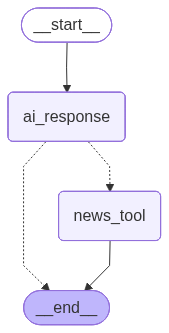

In [20]:
from IPython.display import display, Image
display(Image(news_agent.get_graph().draw_mermaid_png()))

In [24]:
# =============================================
# 5. User Interaction and Data Flow
# Context is maintained across queries using SQLite (when available).
# Past interactions are stored and retrieved efficiently to personalize responses.
# Response time is optimized by structuring the workflow efficiently.


def process_user_request(user_prompt: str, session_id: str, show_details=False):
    """Manages AI chatbot interaction and retrieves responses.

    This function is defensive: it will attempt to use the compiled
    LangGraph agent with a MemorySaver checkpoint when available. If any
    required component is missing or an error occurs, it falls back to
    invoking the tool-bound assistant or the plain AI assistant.
    """
    # Ensure sensible defaults exist
    max_articles = globals().get("max_articles", 5)

    try:
        # Prefer using the news_agent with MemorySaver if available
        if "news_agent" in globals():
            try:
                from langgraph.checkpoint.memory import MemorySaver
                with MemorySaver.from_conn_string("news_session.db") as session_store:
                    session_agent = news_agent.compile(checkpointer=session_store)
                    events = session_agent.stream(
                        {"dialogue_history": [{"role": "user", "content": user_prompt}]},
                        {"configurable": {"session_id": session_id}},
                        stream_mode="values",
                    )

                    print("Processing Request with LangGraph agent..")
                    last_event = None
                    for event in events:
                        last_event = event
                        if show_details:
                            try:
                                print(event["dialogue_history"][-1]["content"])
                            except Exception:
                                pass

                    if last_event is not None:
                        return last_event["dialogue_history"][-1]["content"]
            except Exception as e:
                # If MemorySaver or streaming fails, log and fall back
                print("LangGraph agent/MemorySaver failed, falling back:", e)

        # If ai_with_tools exists, try invoking it directly (non-streaming)
        if "ai_with_tools" in globals():
            try:
                messages = [{"role": "user", "content": user_prompt}]
                result = ai_with_tools.invoke(messages)
                # The returned structure can vary depending on the wrapper
                if isinstance(result, dict):
                    # common structure
                    return result.get("content") or str(result)
                return str(result)
            except Exception as e:
                print("ai_with_tools invocation failed, falling back:", e)

        # Final fallback: call ai_assistant directly if available
        if "ai_assistant" in globals():
            try:
                # Many Chat models accept a simple call or .generate; try common patterns
                messages = [{"role": "user", "content": user_prompt}]
                if hasattr(ai_assistant, "__call__"):
                    resp = ai_assistant(messages)
                elif hasattr(ai_assistant, "generate"):
                    resp = ai_assistant.generate(messages)
                else:
                    resp = str(ai_assistant)

                # Normalize response
                if isinstance(resp, dict):
                    return resp.get("content") or str(resp)
                return str(resp)
            except Exception as e:
                print("ai_assistant call failed:", e)

        # As a last resort, return a simple echo/fallback message
        return f"(Fallback) Processed query: {user_prompt}"

    except Exception as e:
        # Catch-all: ensure the UI receives a message instead of crashing
        return f"Error processing request: {type(e).__name__}: {e}"


In [25]:
# ================================
# 6. Streamlit Frontend (Notebook-adapted)
# ================================
# User interface is designed for ease of use
# User enter queries or select news categories via text input.
# UI improvements include displaying previous interactions.

st.set_page_config(page_title="NewsGenie", layout="wide")
st.title("NewsGenie - AI-Powered News & Information Assistant")

if "history" not in st.session_state:
    st.session_state.history = []

col1, col2 = st.columns([3, 1])
with col1:
    user_session = st.text_input("Session ID:", value="guest001")
with col2:
    if st.button("Clear History"):
        st.session_state.history = []
        st.success("Session history cleared.")

category = st.selectbox("Or pick a news category:", ["", "business", "entertainment", "general", "health", "science", "sports", "technology"], index=0)
query_input = st.text_area("Enter your question or news category (leave blank to use the category selector)")

colA, colB = st.columns(2)
with colA:
    if st.button("Submit"):
        if query_input.strip() or category:
            # If category selected and no query, set query to category for processing
            user_query = query_input.strip() if query_input.strip() else category
            response = process_user_request(user_query, user_session)
            st.markdown(f"**Response:**\n\n{response}")
            st.session_state.history.insert(0, {"time": datetime.utcnow().isoformat(timespec='seconds')+'Z', "session": user_session, "query": user_query, "response": response})
        else:
            st.warning("Please enter a query or select a category.")
with colB:
    if st.button("Get Category News"):
        if category:
            response = process_user_request(category, user_session)
            st.markdown(f"**Response:**\n\n{response}")
            st.session_state.history.insert(0, {"time": datetime.utcnow().isoformat(timespec='seconds')+'Z', "session": user_session, "query": category, "response": response})
        else:
            st.warning("Please select a category first.")

# Session history
st.write("## Session History")
if st.session_state.history:
    for i, e in enumerate(st.session_state.history[:20]):
        with st.expander(f"{e['time']} — {e['session']} — { ( 'category' if e['query'] in ['business','entertainment','general','health','science','sports','technology'] else 'query') }", expanded=(i==0)):
            st.write("**Query:**", e["query"]) 
            st.write("**Response:**")
            st.write(e["response"]) 
else:
    st.info("No history yet. Your recent queries and news updates will appear here.")


2026-01-27 13:07:49.927 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 13:07:49.930 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 13:07:49.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 13:07:49.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 13:07:49.930 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 13:07:49.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 13:07:49.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 13:07:49.937 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar